Here, for the probit and cloglog link functions, I plot the derivatives of the FI.

# Imports:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from binary_links import Probit_Link, CLogLog_Link

# Helper Functions:

In [16]:
def clean_values(df):
    temp_df = pd.DataFrame(df)

    temp_df.columns = ["x", "beta", "deriv_fi"]
    temp_df["beta"] = np.round(temp_df["beta"], 3)
    temp_df["x"] = np.round(temp_df["x"], 3)
    temp_df = temp_df.pivot(columns="x", values="deriv_fi", index="beta")

    return temp_df

# Hyperparmaters:

In [9]:
max_mult = 1_000

# Compute Probit derivatives:

In [10]:
x_abs_max = 2
beta_abs_max = 2

x_range = np.linspace(-x_abs_max, x_abs_max, num=1 + x_abs_max * max_mult)
beta_range = np.linspace(-beta_abs_max, beta_abs_max, num=1 + beta_abs_max * max_mult)

In [11]:
probit_link = Probit_Link()

pos_y_vals = []
zero_y_vals = []
for temp_x in tqdm(x_range):
    for temp_beta in beta_range:
        pos_y_vals.append([temp_x, temp_beta, probit_link.fi_deriv(temp_x, temp_beta, 1)])
        zero_y_vals.append([temp_x, temp_beta, probit_link.fi_deriv(temp_x, temp_beta, 0)])
        

100%|██████████████████████████████████████████████████████████████████████████████| 2001/2001 [12:19<00:00,  2.71it/s]


In [17]:
probit_pos_y_vals = clean_values(pos_y_vals)
probit_zero_y_vals = clean_values(zero_y_vals)

# Compute CLogLog derivatives:

In [18]:
x_abs_max = 1.5
beta_abs_max = 1.5

x_range = np.linspace(-x_abs_max, x_abs_max, num=1 + int(x_abs_max * max_mult))
beta_range = np.linspace(
    -beta_abs_max, beta_abs_max, num=1 + int(beta_abs_max * max_mult)
)

In [19]:
clog_log = CLogLog_Link()

pos_y_vals = []
zero_y_vals = []
for temp_x in tqdm(x_range):
    for temp_beta in beta_range:
        pos_y_vals.append([temp_x, temp_beta, clog_log.fi_deriv(temp_x, temp_beta, 1)])
        zero_y_vals.append([temp_x, temp_beta, clog_log.fi_deriv(temp_x, temp_beta, 0)])
        

100%|██████████████████████████████████████████████████████████████████████████████| 1501/1501 [01:02<00:00, 23.91it/s]


In [20]:
cloglog_pos_y_vals = clean_values(pos_y_vals)
cloglog_zero_y_vals = clean_values(zero_y_vals)

# plot deriv of FI for cloglog + probit concurrently:

In [25]:
x_tick_freq = 200
y_tick_freq = 200

In [34]:
make_greyscale = True

In [40]:
if make_greyscale:
    high_contrast_greys = ['#000000', '#808080', '#C0C0C0']
    sns.set_palette(high_contrast_greys)
    savefile_suffix = '_greyscale'
    cmap=high_contrast_greys
else:
    sns.set_palette('deep')
    cmap='rocket'
    savefile_suffix = ''

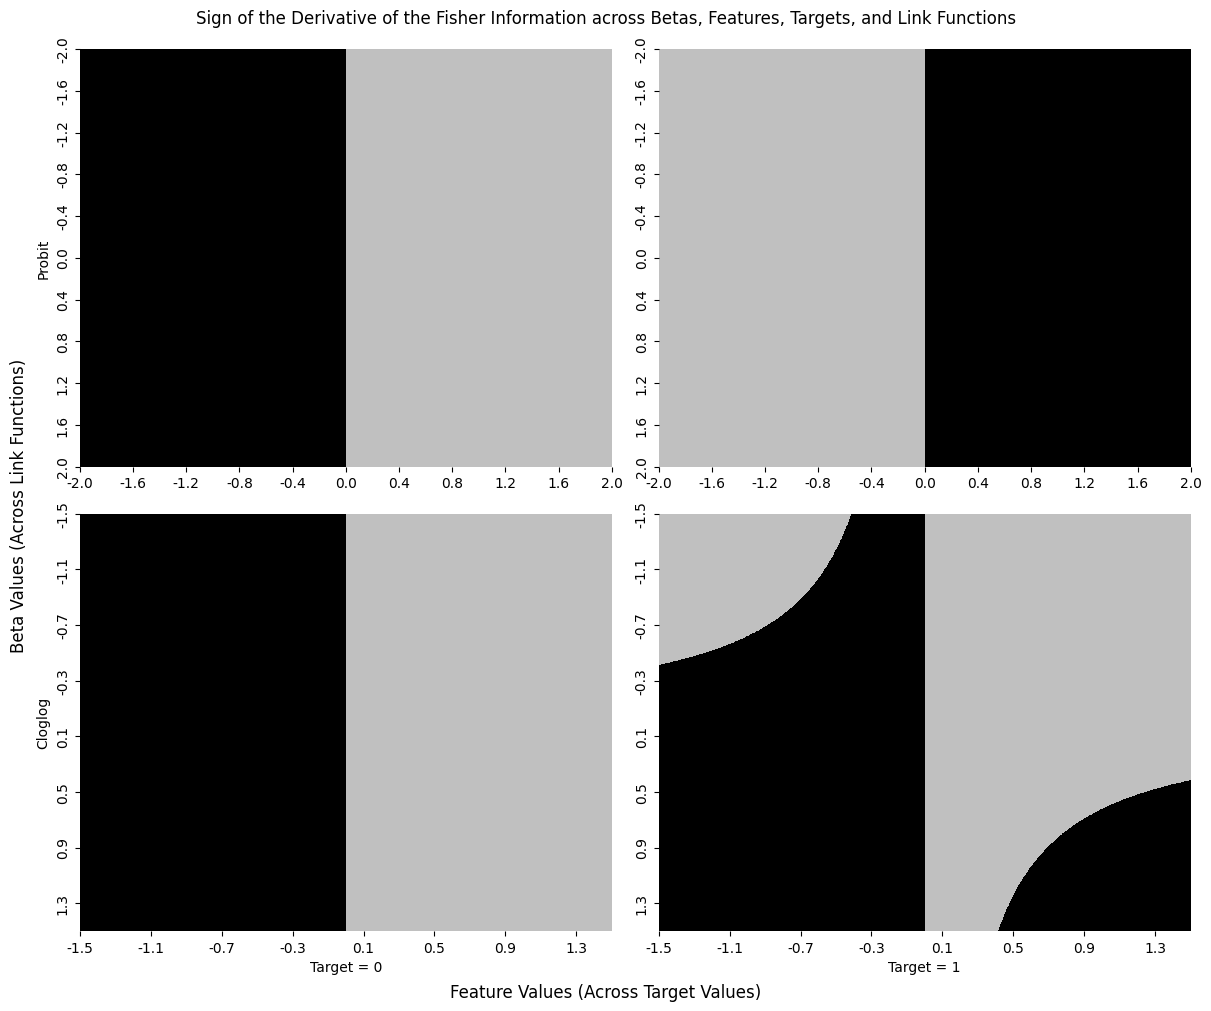

In [41]:
fig, axes = plt.subplots(2, 2, constrained_layout=True, figsize=(12, 10))
sns.heatmap(
    np.sign(probit_zero_y_vals),
    ax=axes[0][0],
    cbar=False,
    xticklabels=x_tick_freq,
    yticklabels=y_tick_freq,
    cmap=cmap,
)
sns.heatmap(
    np.sign(probit_pos_y_vals),
    ax=axes[0][1],
    cbar=False,
    xticklabels=x_tick_freq,
    yticklabels=y_tick_freq,
    cmap=cmap,
)

sns.heatmap(
    np.sign(cloglog_zero_y_vals),
    ax=axes[1][0],
    cbar=False,
    xticklabels=x_tick_freq,
    yticklabels=y_tick_freq,
    cmap=cmap,
)
sns.heatmap(
    np.sign(cloglog_pos_y_vals),
    ax=axes[1][1],
    cbar=False,
    xticklabels=x_tick_freq,
    yticklabels=y_tick_freq,
    cmap=cmap,
)
for i in range(2):
    for j in range(2):
        ax = axes[i][j]
        if i == 1:
            ax.set_xlabel(f"Target = {j}")
        else:
            ax.set_xlabel("")
        if j == 0:
            if i == 0:
                ax.set_ylabel("Probit")
            else:
                ax.set_ylabel("Cloglog")
        else:
            ax.set_ylabel("")
fig.suptitle(
    "Sign of the Derivative of the Fisher Information across "
    + "Betas, Features, Targets, and Link Functions"
)
fig.supxlabel("Feature Values (Across Target Values)")
fig.supylabel("Beta Values (Across Link Functions)")
plt.savefig(f"fi_deriv_signs{savefile_suffix}")